In [31]:
import pandas as pd
from pathlib import Path
import os
import numpy as np
import numpy.random as rnd
import requests
import pandas_datareader.data as web
import datetime as dt
import math
import matplotlib.pyplot as plt

## Binomial Model

In [32]:
# Coinflip 

In [33]:
import math

def combos(n, i):
    return math.factorial(n) / (math.factorial(n-i)*math.factorial(i))

for i in range(5):
    print(combos(4,i))


1.0
4.0
6.0
4.0
1.0


In [34]:
# Payoff


In [35]:
fair_value = 0 
n= 4 # number of coin flips
for k in range(n+1):
    fair_value += combos(n,k)*0.5**k*0.5**(n-k) * k
    
print(fair_value)

#2.0

2.0


In [36]:
# Binomial 

In [37]:
N = 4
S0  = 100
T = 0.5
sigma = 0.4
dt = T/N
K =105
r = 0.05
u = np.exp( sigma * np.sqrt(dt) )
d =  np.exp( -sigma * np.sqrt(dt) )
p = ( np.exp(r*dt) - d) / (u -d)

for k in reversed(range(N+1)):
    ST = S0 * u**k * d ** (N-k)
    print(round(ST,2), round(max(ST-K,0),2))

176.07 71.07
132.69 27.69
100.0 0
75.36 0
56.8 0


In [38]:
# Probability

In [39]:
def combos(n, i):
    return math.factorial(n) / (math.factorial(n-i)*math.factorial(i))
    
for k in reversed(range(N+1)):
    p_star = combos(N, k)*p**k *(1-p)**(N-k)
    print(round(p_star,2))

0.06
0.24
0.37
0.26
0.07


In [40]:
# Finding Call Value 

In [41]:
C=0   
for k in reversed(range(N+1)):
    p_star = combos(N, k)*p**k *(1-p)**(N-k)
    ST = S0 * u**k * d ** (N-k)
    C += max(ST-K,0)*p_star
    
print(np.exp(-r*T)*C)


10.287301121702995


In [42]:
# Binomial option pricing using coinflip

Text(0, 0.5, 'Stock Price')

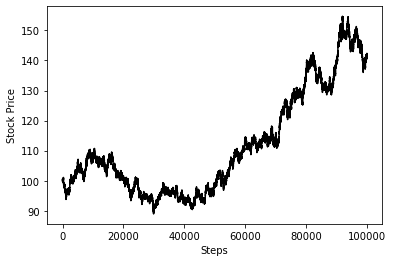

In [43]:
N=100000
sigma = 0.4
T = 0.5
K = 105
r= 0.05
dt = T / N
Heads = np.exp(sigma * np.sqrt(dt))
Tails = np.exp(-sigma * np.sqrt(dt))
S0 = 100
p = (  np.exp(r*dt) - Tails )  /  ( Heads - Tails )
paths = np.random.choice([Heads,Tails],p=[p,1-p],size=(N,1))
plt.plot(paths.cumprod(axis=0)*100, color='black');
plt.xlabel('Steps')
plt.ylabel('Stock Price')

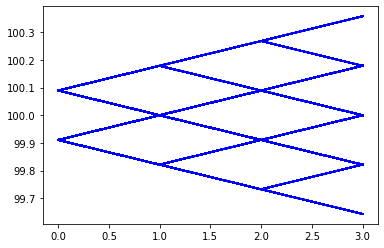

In [49]:
paths = np.random.choice([Heads,Tails],p=[p,1-p],size=(N,1000))
plt.plot(paths.cumprod(axis=0)*100, color='blue');

## The Rough Work code

In [45]:
############params################
N = 4
S0  = 100
T = 0.5
sigma = 0.4
dt = T/N
K =105
r = 0.05
u = np.exp( sigma * np.sqrt(dt) )
d =  np.exp( -sigma * np.sqrt(dt) )
p = ( np.exp(r*dt) - d) / (u -d)


In [46]:
######showing terminal stock prices for 4 step model################

for k in reversed(range(N+1)):
    ST = S0 * u**k * d ** (N-k)
    print(round(ST,2), round(max(ST-K,0),2))


176.07 71.07
132.69 27.69
100.0 0
75.36 0
56.8 0


In [47]:
############showing node probabilities
def combos(n, i):
    return math.factorial(n) / (math.factorial(n-i)*math.factorial(i))
    
for k in reversed(range(N+1)):
    p_star = combos(N, k)*p**k *(1-p)**(N-k)
    print(round(p_star,2))
    

0.06
0.24
0.37
0.26
0.07


In [48]:
######valuing the call from example#######################

C=0   
for k in reversed(range(N+1)):
    p_star = combos(N, k)*p**k *(1-p)**(N-k)
    ST = S0 * u**k * d ** (N-k)
    C += max(ST-K,0)*p_star
    
print(np.exp(-r*T)*C)

10.287301121702995
